# Introduction

In this initial Exploratory Data Analysis, we aim to run through our Data for the two states that we have selected (California and Alaska) and explore the features in each dataset. Through this exploration we want to find possible dependent variables that summarize the data and determine which features might have correlations with these dependent variables. 

In [1]:
from pyspark.sql.functions import *
import numpy as np
import pandas as pd



# Converting Our Files to Parquet

In [ ]:
'''
fnames = !gsutil ls gs://final_proj_bucket/VM2Uniform/*.zip
for one in fnames:
    fullpath = one                # gs://pstat135-voter-file/VM2Uniform/VM2Uniform--NY--2021-03-15.zip 
    gcs_path = !dirname {one}     # [gs://pstat135-voter-file/VM2Uniform]
    gcs_path = gcs_path[0]        # gs://pstat135-voter-file/VM2Uniform
    filename = !basename {one}    # [VM2Uniform--NY--2021-03-15.zip]
    filename = filename[0]        # VM2Uniform--NY--2021-03-15.zip
    
    # fileroot: VM2Uniform--NY--2021-03-15
    # fileext : zip
    fileroot, fileext = filename.split('.')   

    print("##########################")
    print(filename)
    print(gcs_path)
    print(fileroot, fileext)
    
    !gsutil -m cp {one} .                     # copy to local disk
    !unzip {filename}                         # unzip
    !gsutil -m cp {fileroot}* {gcs_path}/     # copy raw files to bucket
    # !echo '{fileroot}*'
    tabfile = gcs_path+'/'+fileroot+'.tab'    # full path to tab file
    pqpath = gcs_path+'/'+fileroot            # parquet file directory
    
    df = spark.read.csv(tabfile, header = True, sep='\t') # read tab file
    df.write.mode('overwrite').parquet(pqpath)            # write data as parquet file
    
    !rm /{fileroot}*  
'''

# Creating Dataframes from Parquet Files

In [3]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
AK_df_ezra = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
CA_df_ezra = spark.read.parquet(bucket_dir + 'VM2Uniform--CA--2021-05-02')

In [2]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
AK_df_branson = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
CA_df_branson = spark.read.parquet(bucket_dir + 'VM2Uniform--CA--2021-05-02')

In [12]:
bucket_dir = 'gs://pstat135-voter-file/VM2Uniform/'
AK_df = spark.read.parquet(bucket_dir + 'VM2Uniform--AK--2021-02-03')
CA_df = spark.read.parquet(bucket_dir + 'VM2Uniform--CA--2021-05-02')

Py4JJavaError: An error occurred while calling o149.parquet.
: java.lang.IllegalStateException: Cannot call methods on a stopped SparkContext.
This stopped SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:750)

The currently active SparkContext was created at:

org.apache.spark.api.java.JavaSparkContext.<init>(JavaSparkContext.scala:58)
sun.reflect.NativeConstructorAccessorImpl.newInstance0(Native Method)
sun.reflect.NativeConstructorAccessorImpl.newInstance(NativeConstructorAccessorImpl.java:62)
sun.reflect.DelegatingConstructorAccessorImpl.newInstance(DelegatingConstructorAccessorImpl.java:45)
java.lang.reflect.Constructor.newInstance(Constructor.java:423)
py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:247)
py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
py4j.Gateway.invoke(Gateway.java:238)
py4j.commands.ConstructorCommand.invokeConstructor(ConstructorCommand.java:80)
py4j.commands.ConstructorCommand.execute(ConstructorCommand.java:69)
py4j.GatewayConnection.run(GatewayConnection.java:238)
java.lang.Thread.run(Thread.java:750)
         
	at org.apache.spark.SparkContext.assertNotStopped(SparkContext.scala:118)
	at org.apache.spark.SparkContext.defaultParallelism(SparkContext.scala:2500)
	at org.apache.spark.sql.execution.datasources.SchemaMergeUtils$.mergeSchemasInParallel(SchemaMergeUtils.scala:60)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat$.mergeSchemasInParallel(ParquetFileFormat.scala:516)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetUtils$.inferSchema(ParquetUtils.scala:107)
	at org.apache.spark.sql.execution.datasources.parquet.ParquetFileFormat.inferSchema(ParquetFileFormat.scala:162)
	at org.apache.spark.sql.execution.datasources.DataSource.$anonfun$getOrInferFileFormatSchema$11(DataSource.scala:209)
	at scala.Option.orElse(Option.scala:447)
	at org.apache.spark.sql.execution.datasources.DataSource.getOrInferFileFormatSchema(DataSource.scala:206)
	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:419)
	at org.apache.spark.sql.DataFrameReader.loadV1Source(DataFrameReader.scala:325)
	at org.apache.spark.sql.DataFrameReader.$anonfun$load$3(DataFrameReader.scala:307)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.DataFrameReader.load(DataFrameReader.scala:307)
	at org.apache.spark.sql.DataFrameReader.parquet(DataFrameReader.scala:833)
	at sun.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at sun.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:498)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:238)
	at java.lang.Thread.run(Thread.java:750)


# Explorative Data Analysis (EDA): Alaska Dataframe

## Alaska Dataframe Dimensions and Schema

First let's look at the number of rows and columns in our dataframe...

In [4]:
print("Number of Rows:    ", AK_df_ezra.count(), \
      "\nNumber of Columns: ", len(AK_df_ezra.columns))

Number of Rows:     548259 
Number of Columns:  726


As we can see for our Alaska dataframe, we have $548,259$ rows and $726$ columns.

Now let us look at all of the features (or column variables) we have available to us in our dataframe...

In [5]:
AK_df_ezra.printSchema()

root
 |-- SEQUENCE: string (nullable = true)
 |-- LALVOTERID: string (nullable = true)
 |-- Voters_Active: string (nullable = true)
 |-- Voters_StateVoterID: string (nullable = true)
 |-- Voters_CountyVoterID: string (nullable = true)
 |-- VoterTelephones_LandlineAreaCode: string (nullable = true)
 |-- VoterTelephones_Landline7Digit: string (nullable = true)
 |-- VoterTelephones_LandlineFormatted: string (nullable = true)
 |-- VoterTelephones_LandlineUnformatted: string (nullable = true)
 |-- VoterTelephones_LandlineConfidenceCode: string (nullable = true)
 |-- VoterTelephones_CellPhoneOnly: string (nullable = true)
 |-- VoterTelephones_CellPhoneFormatted: string (nullable = true)
 |-- VoterTelephones_CellPhoneUnformatted: string (nullable = true)
 |-- VoterTelephones_CellConfidenceCode: string (nullable = true)
 |-- Voters_FirstName: string (nullable = true)
 |-- Voters_MiddleName: string (nullable = true)
 |-- Voters_LastName: string (nullable = true)
 |-- Voters_NameSuffix: string (

We clearly have a lot of features (726 to be exact) to consider in this dataframe that we must further understand and explore prior to our feature selection and feature engineering phase.

## Location in Alaska and Voter Parties

### City of Residence for Voters

In [6]:
# Number of Distinct Cities
AK_df_ezra.select(countDistinct('Residence_Addresses_City')).show()

# Number of Distinct Counties
AK_df_ezra.select(countDistinct('County').alias("Number_of_Counties")).show()

# Number of Voters per each Distinct County
AK_votes_per_county = AK_df_ezra.groupBy('County') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
AK_votes_per_county.show(truncate=False)

# Number of Distinct Parties
AK_df_ezra.select(countDistinct('Parties_Description').alias("Number_of_Parties")).show()

# Number of Voters per each Distinct Party
AK_votes_per_party = AK_df_ezra.groupBy('Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
AK_votes_per_party.show(truncate=False)

# Number of Voters per each Distinct Party in each Distinct County
AK_votes_per_partycounty = AK_df_ezra.groupBy('County', 'Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
AK_votes_per_partycounty.show(truncate=False)

+----------------------------------------+
|count(DISTINCT Residence_Addresses_City)|
+----------------------------------------+
|                                    2705|
+----------------------------------------+



+------------------+
|Number_of_Counties|
+------------------+
|                29|
+------------------+



+---------------------+-------------+
|County               |Number_Voters|
+---------------------+-------------+
|ANCHORAGE            |218565       |
|MATANUSKA SUSITNA    |82135        |
|FAIRBANKS NORTH STAR |69054        |
|KENAI PENINSULA      |49094        |
|JUNEAU               |25984        |
|KETCHIKAN GATEWAY    |11327        |
|BETHEL               |11296        |
|KODIAK ISLAND        |9145         |
|VALDEZ CORDOVA       |8122         |
|SITKA                |6933         |
|NOME                 |6403         |
|SOUTHEAST FAIRBANKS  |5779         |
|NORTH SLOPE          |4893         |
|KUSILVAK             |4801         |
|NORTHWEST ARCTIC     |4572         |
|PRINCE OF WALES HYDER|4332         |
|YUKON KOYUKUK        |4047         |
|DILLINGHAM           |3302         |
|PETERSBURG           |3223         |
|ALEUTIANS WEST       |2399         |
+---------------------+-------------+
only showing top 20 rows



+-----------------+
|Number_of_Parties|
+-----------------+
|                9|
+-----------------+



+-------------------+-------------+
|Parties_Description|Number_Voters|
+-------------------+-------------+
|Unknown            |237742       |
|Republican         |133370       |
|Non-Partisan       |75520        |
|Democratic         |73994        |
|Independence       |17667        |
|Libertarian        |6202         |
|Other              |1765         |
|Green Libertarian  |1406         |
|Constitution       |593          |
+-------------------+-------------+



+--------------------+-------------------+-------------+
|County              |Parties_Description|Number_Voters|
+--------------------+-------------------+-------------+
|ANCHORAGE           |Unknown            |92933        |
|ANCHORAGE           |Republican         |49294        |
|MATANUSKA SUSITNA   |Unknown            |34660        |
|ANCHORAGE           |Democratic         |33821        |
|ANCHORAGE           |Non-Partisan       |31446        |
|FAIRBANKS NORTH STAR|Unknown            |30291        |
|MATANUSKA SUSITNA   |Republican         |27552        |
|KENAI PENINSULA     |Unknown            |20047        |
|FAIRBANKS NORTH STAR|Republican         |17476        |
|KENAI PENINSULA     |Republican         |15421        |
|JUNEAU              |Unknown            |10601        |
|MATANUSKA SUSITNA   |Non-Partisan       |10349        |
|FAIRBANKS NORTH STAR|Non-Partisan       |8964         |
|FAIRBANKS NORTH STAR|Democratic         |8771         |
|KENAI PENINSULA     |Non-Parti

### Distribution of Data

In [7]:
# Number of Voters per each Distinct County
AK_votes_per_county_df = AK_votes_per_county.toPandas()

# Number of Voters per each Distinct Party
AK_votes_per_party_df = AK_votes_per_party.toPandas()

# Number of Voters per each Distinct Party in each Distinct County
AK_votes_per_partycounty_df = AK_votes_per_partycounty.toPandas()

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

#### Number of Voters per each Distinct County

In [9]:
AK_votes_per_county_df.head(29)

,County,Number_Voters
0,ANCHORAGE,218565
1,MATANUSKA SUSITNA,82135
2,FAIRBANKS NORTH STAR,69054
3,KENAI PENINSULA,49094
4,JUNEAU,25984
5,KETCHIKAN GATEWAY,11327
6,BETHEL,11296
7,KODIAK ISLAND,9145
8,VALDEZ CORDOVA,8122
9,SITKA,6933


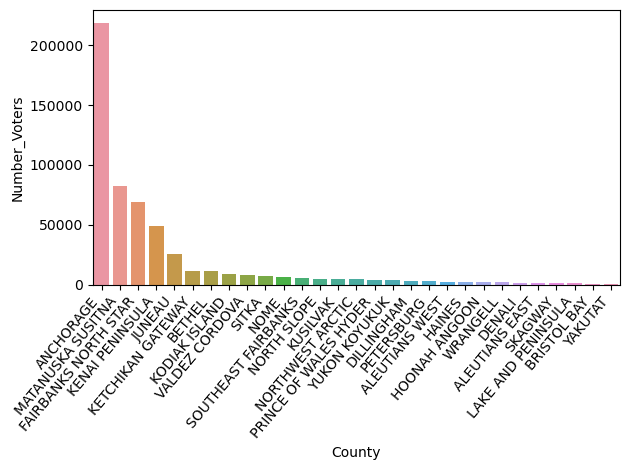

In [10]:
ax1 = sns.barplot(data = AK_votes_per_county_df, \
            x = 'County', \
            y = 'Number_Voters')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party

In [ ]:
AK_votes_per_party_df.head(9)

In [ ]:
ax2 = sns.barplot(data = AK_votes_per_party_df, \
            x = 'Parties_Description', \
            y = 'Number_Voters')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party in each Distinct County

In [ ]:
AK_votes_per_partycounty_df

In [ ]:
cols = AK_votes_per_county_df[['County']]
cols.head(5)

In [ ]:
index = ['ANCHORAGE', 'MATANUSKA SUSITNA', \
         'FAIRBANKS NORTH STAR', 'KENAI PENINSULA', \
         'JUNEAU']

AK_votes_per_party_df.plot(kind='bar', stacked=True)

plt.xlabel('County')
plt.ylabel('Number_Voters')

plt.title('Number of Voters per each Distinct Party and County')

"""
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()
"""

### Missing Value Handling

In [ ]:
AK_cols_list = AK_df_ezra.columns # list of columns in AK_df

def count_missingvals(df, col_list):
    
    """Given dataframe of state voter files and its list of columns, returns the number of missing values
    
    Args:
        df: Dataframe of state voter files 
            Object type should be the output spark.read.parquet() function
        col_list: List of column names
            Object type should be the output df.columns
            
    
    Returns:
        df2.show(): 
    """
    
    df2 = df.select([count(when(col(i).contains('None') | \
                                col(i).contains('NULL') | \
                               (col(i) == '') | \
                                col(i).isNull() | \
                                isnan(i), i)).alias(i)
                    for i in col_list])
    
    return df2.show()

In [ ]:
#index = ['ANCHORAGE', 'MATANUSKA SUSITNA', 'FAIRBANKS NORTH STAR', 'KENAI PENINSULA', 'JUNEAU']count_missingvals(AK_df_ezra, AK_cols_list[:3])

## Party Affiliation for Age, Gender, Marital Status Voters in Alaska

In [ ]:
features_to_include_AK = AK_df_branson.select(['LALVOTERID','Voters_Age','Voters_Gender','MaritalStatus_Description','Parties_Description']).sample(False, 0.75, 42)


In [ ]:
features_branson_AK = features_to_include_AK.toPandas()


In [ ]:
dropped_na_pandas_AK = features_branson_AK.dropna()
# dropped_na_pandas_AK
features_branson_AK

In [ ]:
dropped_na_pandas_AK.apply(lambda x : pd.factorize(x)[0]).corr()

Now to get an idea of some of the general patterns, we will use some aggregate functions on our dataframe after dropping the Null values

In [ ]:
gender_count = dropped_na_pandas_AK.groupby('Voters_Gender').agg({'Voters_Gender':'count'})
gender_count.rename(columns={"Voters_Gender": 'count'})

In [ ]:
married_count = dropped_na_pandas_AK.groupby('MaritalStatus_Description').agg({'MaritalStatus_Description':'count'})
married_count.rename(columns={"MaritalStatus_Description": 'count'})

In [ ]:
dropped_na_pandas_AK['Parties_Description'].value_counts().plot(kind='bar')
plt.title('Count of Voters by Party - Alaska')
plt.xlabel('Party Description')
plt.ylabel('Count')
plt.show()

In [ ]:
counts = dropped_na_pandas_AK.groupby(['Voters_Gender', 'Parties_Description']).size().unstack()


counts.plot(kind='bar', figsize=(10,6))


plt.title('Number of Voters by Gender and Party Description - Alaska')
plt.xlabel('Gender')
plt.ylabel('Number of Voters')


plt.show()

In [ ]:
married_counts = dropped_na_pandas_AK.groupby(['MaritalStatus_Description', 'Parties_Description']).size().unstack()


married_counts.plot(kind='bar', figsize=(10,6))


plt.title('Marital Status and Party Description')
plt.xlabel('Marital Status')
plt.ylabel('Number of Voters')


plt.show()

## Party Affiliation based on Level of Education in Alaska

In [ ]:
#AK_df['Voters_Active'].show(10)

#columns = ["CommericalData_Education","CommercialData_OccupationGroup","CommercialData_Hispanic_Country_Origin","Voters_Active", "Parties_Description"]
#df_temp = spark.createDataFrame(data = AK_df, schema = columns)
#df_temp.show(truncate=False)

#AK_df.select(AK_df["CommericalData_Education"],AK_df["CommericalData_OccupationGroup"], AK_df["CommericalData_Hispanic_Country_Origin"], AK_df["Voters_Active"], AK_df["Parties_Descriptions"]).show(10)  



#AK_df[AK_df['CommercialData_Education']].show(10)
#filtered_df = AK_df.filter(F.col(['Voters_Active','Parties_Description','CommercialData_Education', 'CommercialData_OccupationGroup', 'CommercialData_Education'])).collect()
#AK_df[AK_df["CommercialData_Education"]].head()

#new_df = AK_df.filter(["CommercialData_Education", "CommercialData_OccupationGroup", "Voters_Active", "Parties_Description"], axis = 1)
                      
#new_df = pd.DataFrame([AK_df.CommercialData_Education & AK_df.CommercialData_OccupationGroup & AK_df.Voters_Active]).transpose()                      
    
new_df = AK_df.select("CommercialData_Education", "CommercialData_OccupationGroup", "Voters_Active", "Parties_Description")
new_df.show()
pandas_new_df = new_df.toPandas()

pd.crosstab(pandas_new_df['Parties_Description'], pandas_new_df['CommercialData_Education'])




    


In [ ]:
pd.crosstab(pandas_new_df['Parties_Description'], pandas_new_df['CommercialData_Education']).plot.bar(stacked=True)


## Voter Activity based on Voter Occupation in Alaska

In [ ]:
pd.crosstab(pandas_new_df['Voters_Active'], pandas_new_df['CommercialData_OccupationGroup'])

In [ ]:
pd.crosstab(pandas_new_df['Voters_Active'], pandas_new_df['CommercialData_OccupationGroup']).plot.bar(stacked = True)

# Explorative Data Analysis (EDA): California Dataframe

## California Dataframe Dimensions and Schema

First let's look at the number of rows and columns in our dataframe...

In [ ]:
print("Number of Rows:    ", CA_df_ezra.count(), \
      "\nNumber of Columns: ", len(CA_df_ezra.columns))

As we can see for our California dataframe, we have $21,779,518$ rows and $726$ columns.

Now let us look at all of the features (or column variables) we have available to us in our dataframe...

In [ ]:
#CA_df_ezra.printSchema()

We clearly have a lot of features (726 to be exact) to consider in this dataframe that we must further understand and explore prior to our feature selection and feature engineering phase.

## Location in California and Voter Party

### City of Residence for Voters

In [ ]:
# Number of Distinct Cities
CA_df_ezra.select(countDistinct('Residence_Addresses_City')).show()

# Number of Distinct Counties
CA_df_ezra.select(countDistinct('County').alias("Number_of_Counties")).show()

# Number of Voters per each Distinct County
CA_votes_per_county = CA_df_ezra.groupBy('County') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
CA_votes_per_county.show(truncate=False)

# Number of Distinct Parties
CA_df_ezra.select(countDistinct('Parties_Description').alias("Number_of_Parties")).show()

# Number of Voters per each Distinct Party
CA_votes_per_party = CA_df_ezra.groupBy('Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
CA_votes_per_party.show(truncate=False)

# Number of Voters per each Distinct Party in each Distinct County
CA_votes_per_partycounty = CA_df_ezra.groupBy('County', 'Parties_Description') \
    .agg(countDistinct('LALVOTERID').alias("Number_Voters")) \
    .sort(desc("Number_Voters"))
CA_votes_per_partycounty.show(truncate=False)

### Distribution of Data

In [ ]:
# Number of Voters per each Distinct County
CA_votes_per_county_df = CA_votes_per_county.toPandas()

# Number of Voters per each Distinct Party
CA_votes_per_party_df = CA_votes_per_party.toPandas()

# Number of Voters per each Distinct Party in each Distinct County
CA_votes_per_partycounty_df = CA_votes_per_partycounty.toPandas()

#### Number of Voters per each Distinct County

In [ ]:
CA_votes_per_county_df.head(29)

In [ ]:
ax1 = sns.barplot(data = CA_votes_per_county_df, \
            x = 'County', \
            y = 'Number_Voters')

ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party

In [ ]:
CA_votes_per_party_df.head(9)

In [ ]:
ax2 = sns.barplot(data = CA_votes_per_party_df, \
            x = 'Parties_Description', \
            y = 'Number_Voters')

ax2.set_xticklabels(ax2.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()

#### Number of Voters per each Distinct Party in each Distinct County

In [ ]:
CA_votes_per_partycounty_df

In [ ]:
cols = CA_votes_per_county_df[['County']]
cols.head(5)

In [ ]:
index = ['ANCHORAGE', 'MATANUSKA SUSITNA', \
         'FAIRBANKS NORTH STAR', 'KENAI PENINSULA', \
         'JUNEAU']

CA_votes_per_party_df.plot(kind='bar', stacked=True)

plt.xlabel('County')
plt.ylabel('Number_Voters')

plt.title('Number of Voters per each Distinct Party and County')

"""
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")
plt.tight_layout()
plt.show()
"""

### Missing Value Handling

In [ ]:
CA_cols_list = CA_df_ezra.columns # list of columns in CA_df

def count_missingvals(df, col_list):
    
    """Given dataframe of state voter files and its list of columns, returns the number of missing values
    
    Args:
        df: Dataframe of state voter files 
            Object type should be the output spark.read.parquet() function
        col_list: List of column names
            Object type should be the output df.columns
            
    
    Returns:
        df2.show(): 
    """
    
    df2 = df.select([count(when(col(i).contains('None') | \
                                col(i).contains('NULL') | \
                               (col(i) == '') | \
                                col(i).isNull() | \
                                isnan(i), i)).alias(i)
                    for i in col_list])
    
    return df2.show()

In [ ]:
#count_missingvals(CA_df_ezra, CA_cols_list[:3])

## Party Affiliation for Age, Gender, Marital Status Voters in California

In [11]:
california_columns = CA_df_branson.columns

In [13]:
california_columns
#Let's Select a Dependent Variable 

dependent_variable_branson = CA_df_branson.select('Parties_Description').distinct()
dependent_variable_branson.show()

#This gives us an idea of the type of data we are working with for our dependent variable

+--------------------+
| Parties_Description|
+--------------------+
|          Republican|
|             Unknown|
|American Independent|
|               Other|
|         Libertarian|
|               Green|
|         Natural Law|
|              Reform|
|   Peace and Freedom|
|          Democratic|
|        Non-Partisan|
+--------------------+



In [3]:
#Now we want to select features of interest that we want to include for our exploration

features_to_include_CA = CA_df_branson.select(['LALVOTERID','Voters_Age','Voters_Gender','MilitaryStatus_Description','MaritalStatus_Description','Parties_Description']).sample(False, 0.5, 42)


+--------------+----------+-------------+--------------------------+-------------------------+--------------------+
|    LALVOTERID|Voters_Age|Voters_Gender|MilitaryStatus_Description|MaritalStatus_Description| Parties_Description|
+--------------+----------+-------------+--------------------------+-------------------------+--------------------+
|LALCA572962902|        20|            M|                      null|                     null|          Democratic|
|LALCA596067819|        61|            M|                      null|                  Married|          Democratic|
|LALCA400909708|        37|            M|                      null|                     null|          Republican|
| LALCA20620895|        43|            M|                      null|                     null|          Republican|
| LALCA20623922|        34|            M|                      null|          Non-Traditional|        Non-Partisan|
| LALCA20607380|        55|            M|                      null|    

In [ ]:
features_branson_CA

In [ ]:
dropped_na_pandas_CA = features_branson_CA.dropna()



In [ ]:
dropped_na_pandas_CA.head()

## Looking for Correlations

In [ ]:
dropped_na_pandas_CA.apply(lambda x : pd.factorize(x)[0]).corr(method='spearman')

Now to get an idea of some of the general patterns, we will use some aggregate functions on our dataframe after dropping the Null values

In [ ]:
military_count = dropped_na_pandas_CA.groupby('MilitaryStatus_Description').agg({'MilitaryStatus_Description':'count'})
military_count.rename(columns={"MilitaryStatus_Description": 'count'})

In [ ]:
gender_count = dropped_na_pandas_CA.groupby('Voters_Gender').agg({'Voters_Gender':'count'})
gender_count.rename(columns={"Voters_Gender": 'count'})

In [ ]:
married_count = dropped_na_pandas_CA.groupby('MaritalStatus_Description').agg({'MaritalStatus_Description':'count'})
married_count.rename(columns={"MaritalStatus_Description": 'count'})

In [ ]:
dropped_na_pandas_CA['Parties_Description'].value_counts().plot(kind='bar')
plt.title('Count of Voters by Party')
plt.xlabel('Party Description')
plt.ylabel('Count')
plt.show()

In [ ]:
counts = dropped_na_pandas_CA.groupby(['Voters_Gender', 'Parties_Description']).size().unstack()


counts.plot(kind='bar', figsize=(10,6))


plt.title('Number of Voters by Gender and Party Description')
plt.xlabel('Gender')
plt.ylabel('Number of Voters')


plt.show()

In [ ]:
military_pandas_df = dropped_na_pandas_CA[dropped_na_pandas_CA['MilitaryStatus_Description'] == 'Military']
military_counts = military_pandas_df.groupby(['MilitaryStatus_Description', 'Parties_Description']).size().unstack()


military_counts.plot(kind='bar', figsize=(10,6))


plt.title('Number of Voters in Military and Party Description')
plt.xlabel('Military Status')
plt.ylabel('Number of Voters')


plt.show()

In [ ]:

married_counts = dropped_na_pandas_CA.groupby(['MaritalStatus_Description', 'Parties_Description']).size().unstack()


married_counts.plot(kind='bar', figsize=(10,6))


plt.title('Marital Status and Party Description')
plt.xlabel('Marital Status')
plt.ylabel('Number of Voters')


plt.show()

## Party Affiliation based on Level of Education in California

In [ ]:
from pyspark.sql import functions as F
   
new_df = CA_df.select("CommercialData_Education", "CommercialData_OccupationGroup", "Voters_Active", "Parties_Description")
new_df.show()


    
    


In [ ]:
pd.crosstab(pandas_new_df['Parties_Description'], pandas_new_df['CommercialData_Education'])

We are mainly targeting voters in the largest blue and red states (California and Alaska, respectively), but we require more exploration to narrow down our scope. We have so far focused mainly on party affiliation, personal background, and county of origin.

In [ ]:
pandas_new_df












##  lifestyle factors and influence on certain dependent variables

In [3]:
from pyspark.ml.feature import *
from pyspark.ml.regression import *
from pyspark.ml.evaluation import *
from pyspark.ml import *

In [4]:
characteristics_df =CA_df_branson.select(['County', 'Ethnic_Description','CommercialDataLL_Donates_to_Veterans_Causes','Precinct', 'CommercialDataLL_Gun_Owner','CommercialDataLL_Interest_in_Exercise_Health_In_Household', 'ElectionReturns_P16_Cnty_Vote_Trump_R','CommercialDataLL_Interest_in_Smoking_In_Household'])


In [5]:
input_cols = []
for i in characteristics_df.columns:
    if i not in ['ElectionReturns_P16_Cnty_Vote_Trump_R', 'ElectionReturns_P16_Cnty_Vote_Clinton_D']:
        input_cols.append(i)


In [6]:
input_cols

['County',
 'Ethnic_Description',
 'CommercialDataLL_Donates_to_Veterans_Causes',
 'Precinct',
 'CommercialDataLL_Gun_Owner',
 'CommercialDataLL_Interest_in_Exercise_Health_In_Household',
 'CommercialDataLL_Interest_in_Smoking_In_Household']

In [7]:
characteristics_df = characteristics_df.withColumn('ElectionReturns_P16_Cnty_Vote_Trump_R',col('ElectionReturns_P16_Cnty_Vote_Trump_R').cast('float') )

In [8]:
characteristics_df.printSchema()

root
 |-- County: string (nullable = true)
 |-- Ethnic_Description: string (nullable = true)
 |-- CommercialDataLL_Donates_to_Veterans_Causes: string (nullable = true)
 |-- Precinct: string (nullable = true)
 |-- CommercialDataLL_Gun_Owner: string (nullable = true)
 |-- CommercialDataLL_Interest_in_Exercise_Health_In_Household: string (nullable = true)
 |-- ElectionReturns_P16_Cnty_Vote_Trump_R: float (nullable = true)
 |-- CommercialDataLL_Interest_in_Smoking_In_Household: string (nullable = true)



In [9]:
characteristics_df.dropna(subset=['County'])

DataFrame[County: string, Ethnic_Description: string, CommercialDataLL_Donates_to_Veterans_Causes: string, Precinct: string, CommercialDataLL_Gun_Owner: string, CommercialDataLL_Interest_in_Exercise_Health_In_Household: string, ElectionReturns_P16_Cnty_Vote_Trump_R: float, CommercialDataLL_Interest_in_Smoking_In_Household: string]

In [10]:
characteristics_df.dropna(subset=['Ethnic_Description'])

DataFrame[County: string, Ethnic_Description: string, CommercialDataLL_Donates_to_Veterans_Causes: string, Precinct: string, CommercialDataLL_Gun_Owner: string, CommercialDataLL_Interest_in_Exercise_Health_In_Household: string, ElectionReturns_P16_Cnty_Vote_Trump_R: float, CommercialDataLL_Interest_in_Smoking_In_Household: string]

In [11]:
characteristics_df.dropna(subset=['Precinct'])

DataFrame[County: string, Ethnic_Description: string, CommercialDataLL_Donates_to_Veterans_Causes: string, Precinct: string, CommercialDataLL_Gun_Owner: string, CommercialDataLL_Interest_in_Exercise_Health_In_Household: string, ElectionReturns_P16_Cnty_Vote_Trump_R: float, CommercialDataLL_Interest_in_Smoking_In_Household: string]

In [12]:
characteristics_df = characteristics_df.fillna({input_cols[2]: 'No'})

In [13]:
characteristics_df = characteristics_df.fillna({input_cols[4]: 'No'})

In [14]:
characteristics_df = characteristics_df.fillna({input_cols[5]: 'No'})

In [15]:
cleaned_df = characteristics_df.fillna({input_cols[6]: 'No'})

In [16]:
cleaned_df = cleaned_df.dropna()

In [17]:
cleaned_df.rdd.getNumPartitions()

39

In [18]:
cleaned_df.repartition(100)

DataFrame[County: string, Ethnic_Description: string, CommercialDataLL_Donates_to_Veterans_Causes: string, Precinct: string, CommercialDataLL_Gun_Owner: string, CommercialDataLL_Interest_in_Exercise_Health_In_Household: string, ElectionReturns_P16_Cnty_Vote_Trump_R: float, CommercialDataLL_Interest_in_Smoking_In_Household: string]

In [19]:
cleaned_df.columns

['County',
 'Ethnic_Description',
 'CommercialDataLL_Donates_to_Veterans_Causes',
 'Precinct',
 'CommercialDataLL_Gun_Owner',
 'CommercialDataLL_Interest_in_Exercise_Health_In_Household',
 'ElectionReturns_P16_Cnty_Vote_Trump_R',
 'CommercialDataLL_Interest_in_Smoking_In_Household']

In [20]:
voter_train, voter_test = cleaned_df.randomSplit([0.8, 0.2], seed = 1234)

In [21]:
idx_cols = []
for j in input_cols:
    j = j +'_idx'
    idx_cols.append(j)

In [22]:
dummy_cols = []
for j in input_cols:
    j = j +'_dummy'
    dummy_cols.append(j)

In [23]:
#Convert categorical strings to index values
indexer = StringIndexer(inputCols = input_cols, outputCols = idx_cols)



In [24]:
# One-hot encode index values
onehot = OneHotEncoder(
    inputCols= idx_cols,
    outputCols=dummy_cols)

In [25]:
cleaned_df.show()

KeyboardInterrupt: 

In [26]:
# Assemble predictors into a single column
assembler = VectorAssembler(inputCols=dummy_cols, outputCol='features')

In [27]:
regression = LinearRegression(labelCol = 'ElectionReturns_P16_Cnty_Vote_Trump_R')

In [28]:
pipeline = Pipeline(stages=[indexer, onehot, assembler, regression])

# Train the pipeline on the training data
pipeline = pipeline.fit(voter_train)

# Make predictions on the testing data
# predictions = pipeline.transform(voter_test)

23/03/10 06:10:55 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/03/10 06:14:36 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/03/10 06:14:38 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/03/10 06:18:10 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/03/10 06:18:10 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeSystemBLAS
23/03/10 06:18:10 WARN com.github.fommil.netlib.BLAS: Failed to load implementation from: com.github.fommil.netlib.NativeRefBLAS
23/03/10 06:18:11 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/03/10 06:18:15 WARN org.apache.spark.scheduler.DAGScheduler: Broadcasting large task binary with size 4.2 MiB
23/03/10 06:18:16 WARN org.apache.spark.scheduler.DAGSchedule

We can see here that the dataframe has 1848404 missing rows for Ethnic Description out of 21779518

In [ ]:
valid_df = characteristics_df.dropna()

In [ ]:
valid_df.count()

When we drop the NA values from the dataframe we only have 14066 rows which means that we had a lot of missing data

-So now we want to see what the unique values are for each of the distinct columns to see how to deal with categorical variables

In [ ]:
valid_df.select('Ethnic_Description').distinct().show()

In [ ]:
vetarans_col_vals = valid_df.select('CommercialDataLL_Donates_to_Veterans_Causes').distinct().collect()

In [ ]:
precinct_col_vals = valid_df.select('Precinct').distinct().collect()

In [ ]:
gunowner_col_vals = valid_df.select('CommercialDataLL_Gun_Owner').distinct().collect()

In [ ]:
exercise_health_col_vals =valid_df.select('CommercialDataLL_Interest_in_Exercise_Health_In_Household').distinct().collect()

In [ ]:
smoking_col_vals = valid_df.select('CommercialDataLL_Interest_in_Smoking_In_Household').distinct().collect()

In [ ]:
for x in precinct_col_vals:
    print(x[0])

In [ ]:
smoking_col_vals[0]

In [ ]:
gunowner_col_vals

In [ ]:
returns_df = CA_df_branson.select('ElectionReturns_G10CountyTurnoutAllRegisteredVoters')
distinct_vals_returns  = returns_df.distinct()
collect1 = distinct_vals_returns.collect()
collect1.show()

In [ ]:
test_df1 = CA_df_branson.select(['County',"ElectionReturns_G12CountyTurnoutDemocrats"])

In [ ]:
test_df1